In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [2]:
%matplotlib inline
# warnings.filterwarnings('ignore')
sns.set()

In [3]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Observation

In [4]:
df.shape

(8523, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [7]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Raw EDA

In [9]:
from ydata_profiling import ProfileReport

C:\Users\Parag\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
pr = ProfileReport(df = df)

In [11]:
# pr.to_file(output_file= "raw_report.html")

## Basic Preprocessing

In [12]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [13]:
df.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [14]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [15]:
def count_categorical_variables(df, max_unique):
    for colname in df.columns:
        if len(df[colname].unique()) > max_unique:
            continue
        print("Column: "+colname)
        print(df[colname].value_counts())
        print()

In [16]:
count_categorical_variables(df, 20)

Column: Item_Fat_Content
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Column: Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Column: Outlet_Establishment_Year
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997  

In [17]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat',
                                'reg': 'Regular',
                                'low fat': 'Low Fat'})

In [18]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [19]:
df['Item_Identifier']

0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object

In [20]:
df['New_Item_Type'] = df['Item_Identifier'].apply(lambda x : x[:2])

In [21]:
df.New_Item_Type

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [22]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [23]:
df[df['New_Item_Type'] == 'NC']['Item_Fat_Content']

4       Low Fat
16      Low Fat
22      Low Fat
25      Low Fat
31      Low Fat
         ...   
8500    Low Fat
8502    Low Fat
8504    Low Fat
8516    Low Fat
8520    Low Fat
Name: Item_Fat_Content, Length: 1599, dtype: object

In [24]:
df['Item_Fat_Content'] = np.where(df['New_Item_Type'] == 'NC',"Non-Edible", df['Item_Fat_Content'])

In [25]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

In [26]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [27]:
df['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

In [28]:
df['Outlet_Establishment_Year'].min(), df['Outlet_Establishment_Year'].max()

(1985, 2009)

In [29]:
DATA_COLLECTION_YEAR = 2013

In [30]:
df['Outlet_Age'] = DATA_COLLECTION_YEAR - df['Outlet_Establishment_Year']

In [31]:
df['Outlet_Age']

0       14
1        4
2       14
3       15
4       26
        ..
8518    26
8519    11
8520     9
8521     4
8522    16
Name: Outlet_Age, Length: 8523, dtype: int64

In [32]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [33]:
count_categorical_variables(df, 20)

Column: Item_Fat_Content
Item_Fat_Content
Low Fat       3918
Regular       3006
Non-Edible    1599
Name: count, dtype: int64

Column: Item_Type
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

Column: Outlet_Identifier
Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

Column: Outlet_Establishment_Year
Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
200

## Univariate  EDA

In [34]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Age'],
      dtype='object')

In [35]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


<Axes: xlabel='Item_Weight', ylabel='Density'>

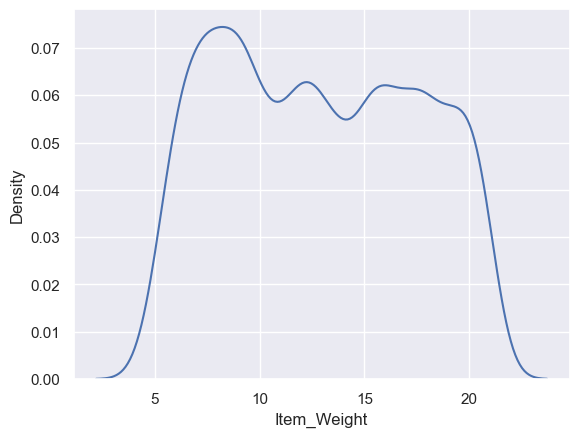

In [36]:
sns.kdeplot(df['Item_Weight'])

<Axes: ylabel='Item_Weight'>

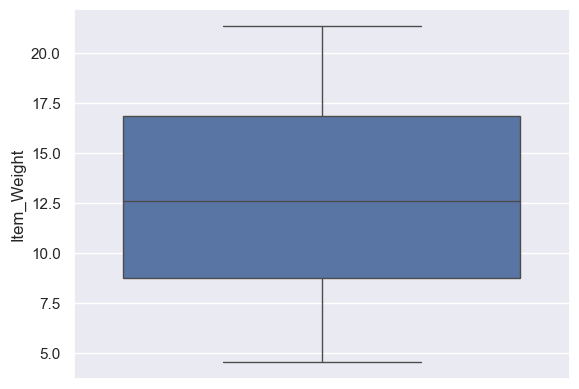

In [37]:
sns.boxplot(df['Item_Weight'])

<Axes: xlabel='Item_Weight', ylabel='Count'>

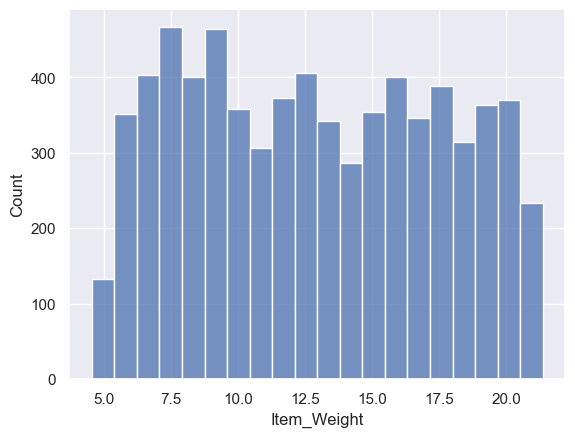

In [38]:
sns.histplot(df['Item_Weight'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

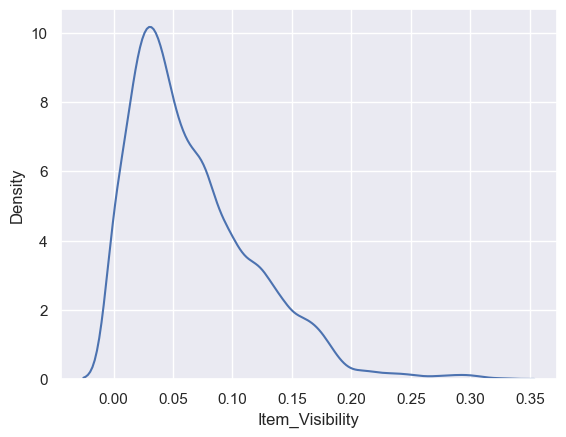

In [39]:
sns.kdeplot(df['Item_Visibility'])

<Axes: ylabel='Item_Visibility'>

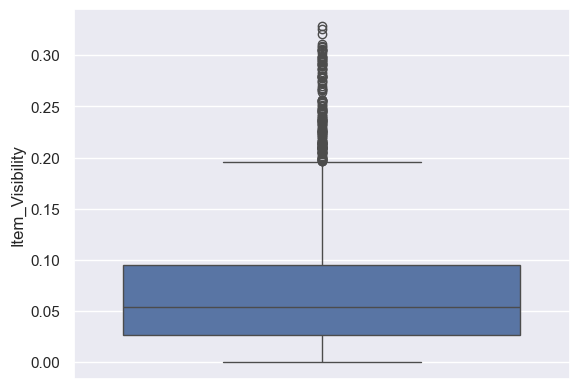

In [40]:
sns.boxplot(df['Item_Visibility'])

<Axes: xlabel='Item_Visibility', ylabel='Density'>

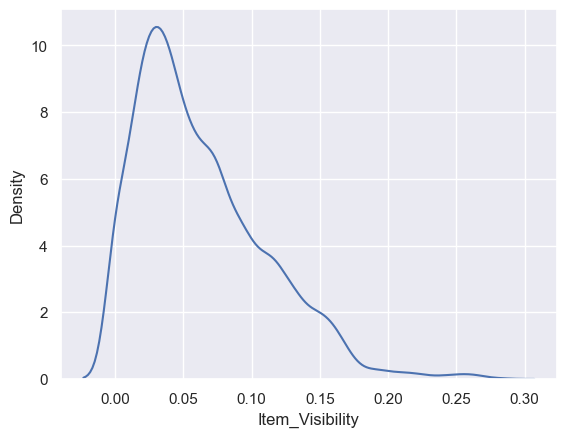

In [40]:
sns.kdeplot(np.log1p(df['Item_Visibility']))

<Axes: xlabel='Item_Visibility', ylabel='Density'>

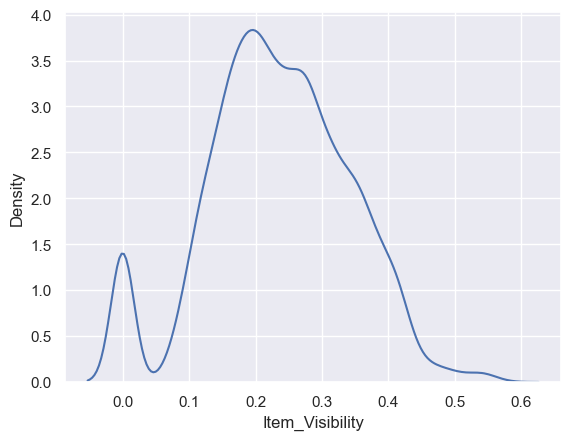

In [41]:
sns.kdeplot(np.sqrt(df['Item_Visibility']))

<Axes: ylabel='Item_Visibility'>

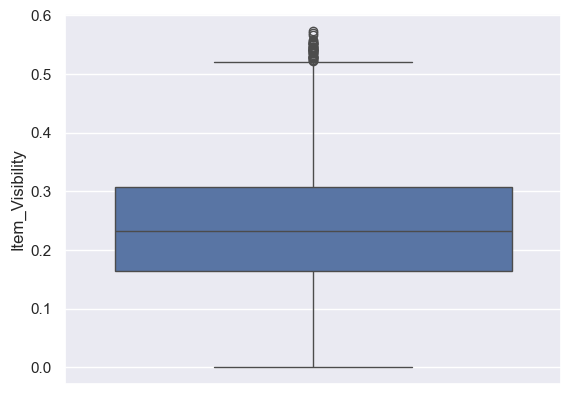

In [41]:
sns.boxplot(np.sqrt(df[df['Item_Visibility']!=0.]['Item_Visibility']))
## Item visibility - sparse column

<Axes: xlabel='Item_MRP', ylabel='Density'>

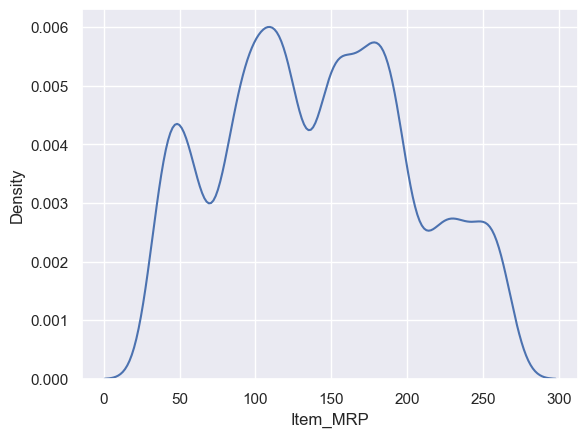

In [43]:
sns.kdeplot(df['Item_MRP'])
# Can apply binning to split into categories

<Axes: ylabel='Item_MRP'>

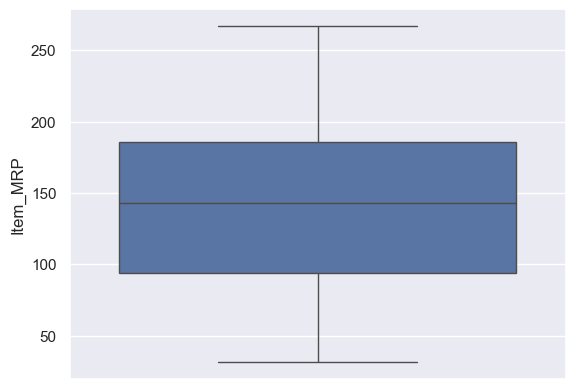

In [44]:
sns.boxplot(df['Item_MRP'])

In [45]:
df[['Item_MRP', 'Item_Outlet_Sales']].corr()

,Item_MRP,Item_Outlet_Sales
Item_MRP,1.000000,0.567574
Item_Outlet_Sales,0.567574,1.000000


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

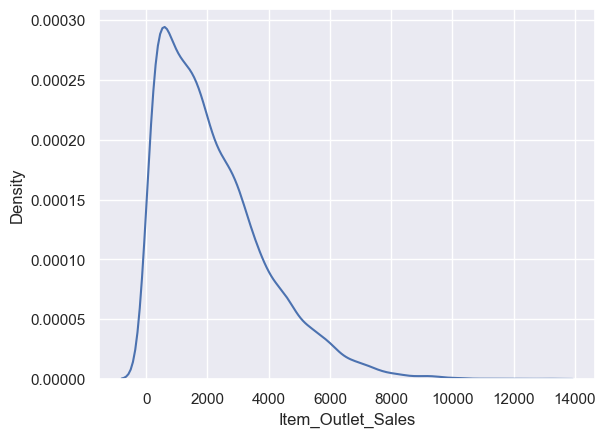

In [46]:
sns.kdeplot(df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

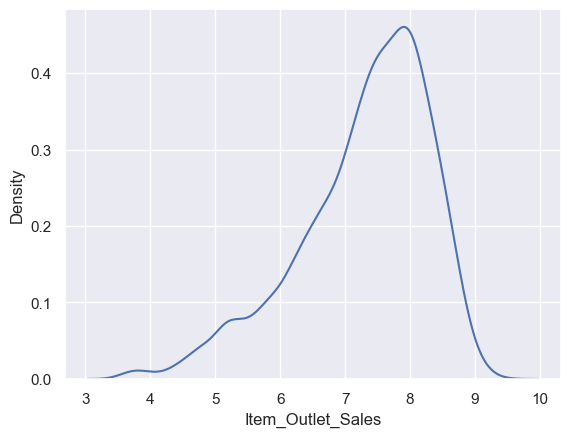

In [47]:
sns.kdeplot(np.log1p(df['Item_Outlet_Sales']))

<Axes: ylabel='Item_Outlet_Sales'>

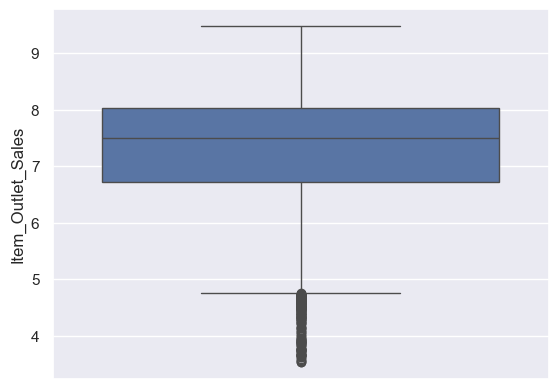

In [126]:
sns.boxplot(np.log1p( df['Item_Outlet_Sales']))

<Axes: ylabel='Item_Outlet_Sales'>

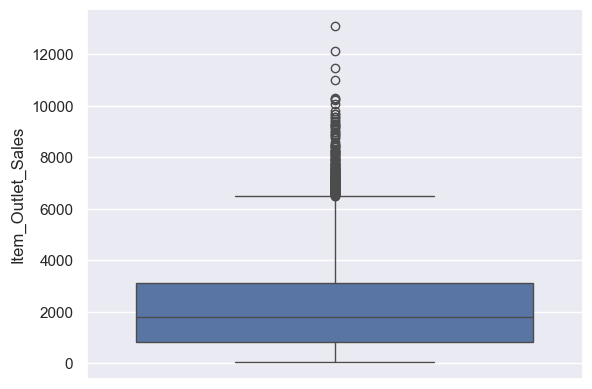

In [127]:
sns.boxplot(( df['Item_Outlet_Sales']))

<Axes: xlabel='Item_Fat_Content', ylabel='count'>

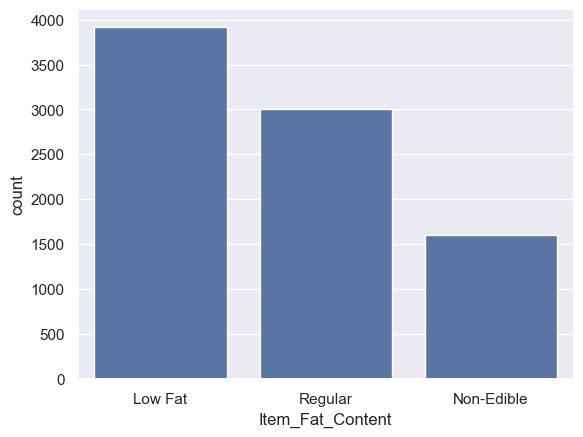

In [49]:
sns.countplot(x =df["Item_Fat_Content"])

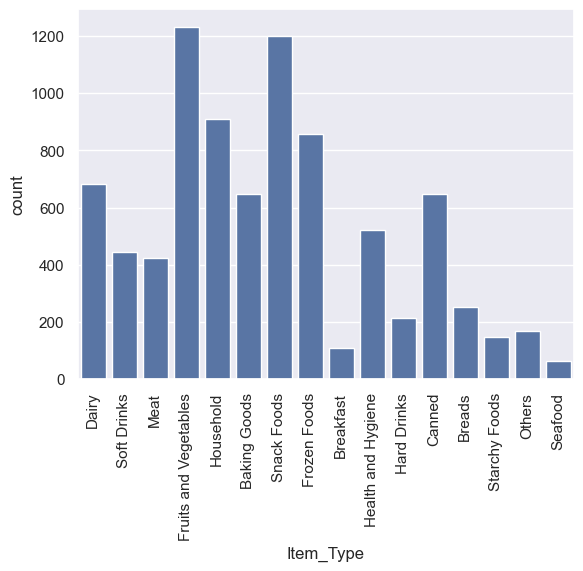

In [50]:
sns.countplot(data=df, x = "Item_Type")
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='New_Item_Type', ylabel='count'>

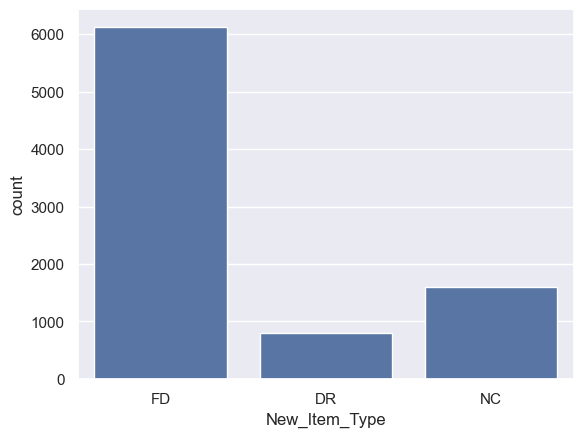

In [51]:
sns.countplot(data=df, x = "New_Item_Type")

<Axes: xlabel='Outlet_Location_Type', ylabel='count'>

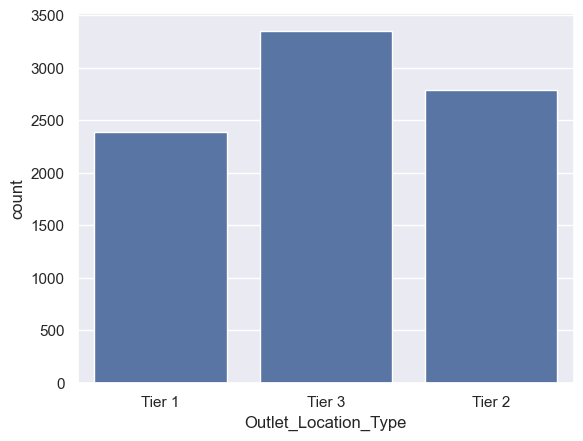

In [52]:
sns.countplot(x =df['Outlet_Location_Type'])

In [53]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Age'],
      dtype='object')

<Axes: xlabel='Outlet_Type', ylabel='count'>

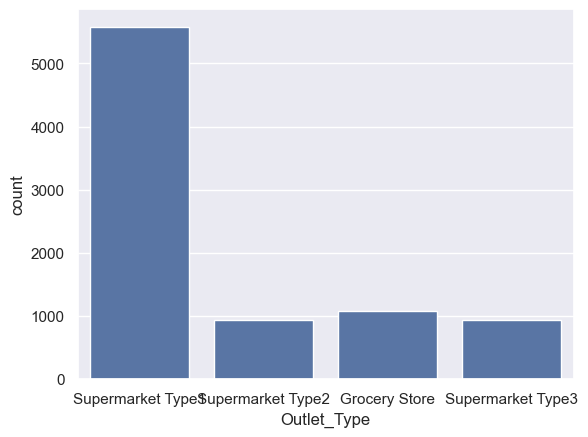

In [54]:
sns.countplot(x =df['Outlet_Type'])

<Axes: xlabel='Outlet_Age'>

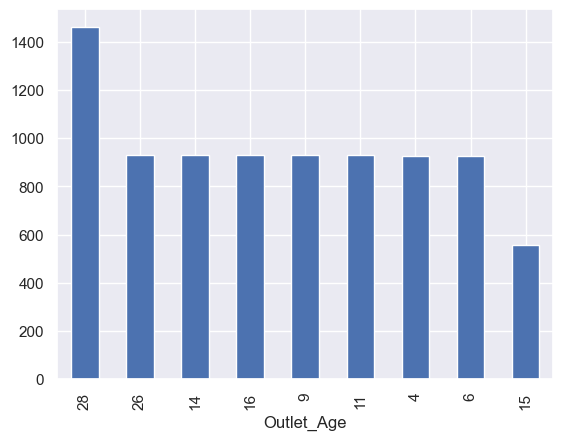

In [55]:
df['Outlet_Age'].value_counts().plot(kind = 'bar')

## Multivariate EDA

In [56]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Age'],
      dtype='object')

In [57]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

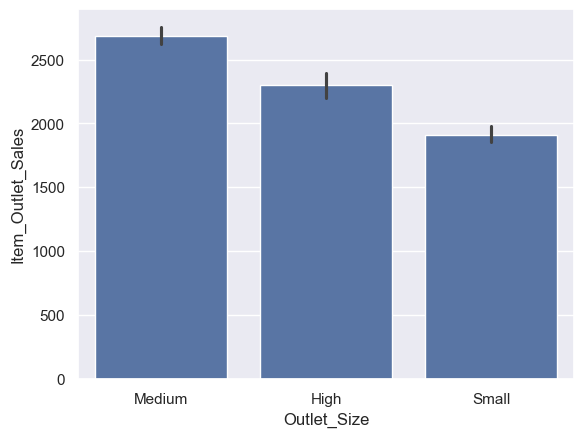

In [58]:
sns.barplot(x = df['Outlet_Size'],y = df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Visibility', ylabel='Item_MRP'>

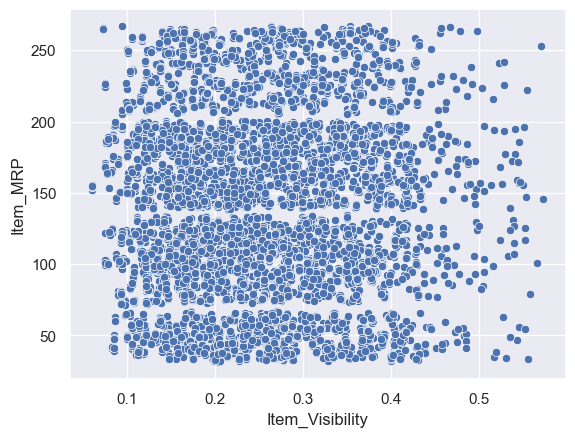

In [59]:
sns.scatterplot(x = np.sqrt(df[df['Item_Visibility']!=0.]['Item_Visibility']), y = df['Item_MRP'])

In [60]:
df[['Item_Visibility', 'Item_MRP']].corr()

,Item_Visibility,Item_MRP
Item_Visibility,1.000000,-0.001315
Item_MRP,-0.001315,1.000000


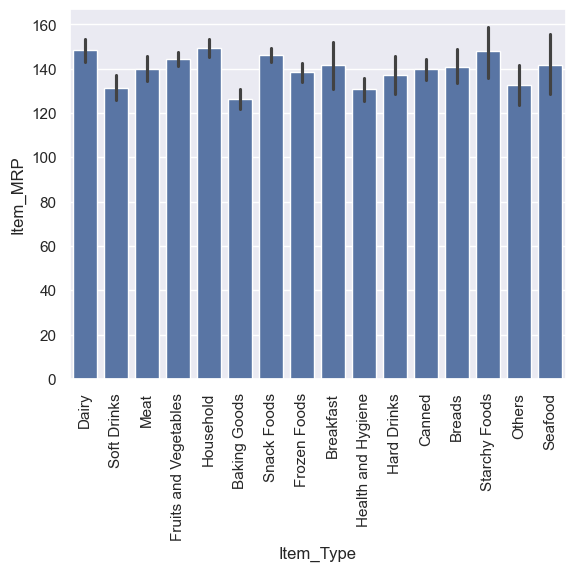

In [61]:
sns.barplot(x = df['Item_Type'], y = df['Item_MRP'])
plt.xticks(rotation = 90)
plt.show()

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

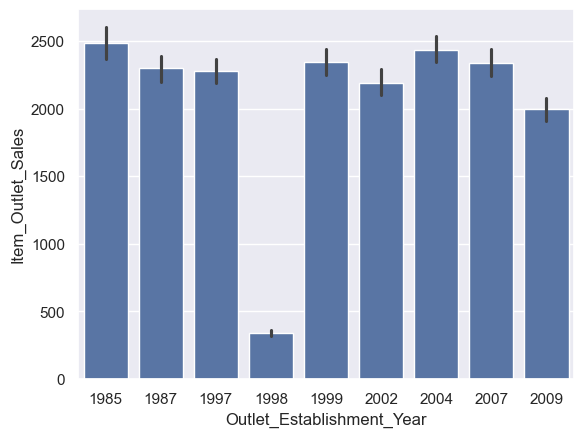

In [62]:
sns.barplot(x = df['Outlet_Establishment_Year'], y=df['Item_Outlet_Sales'])

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_MRP'>

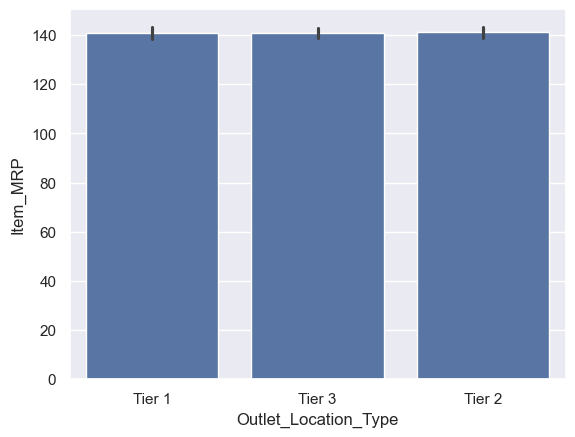

In [83]:
sns.barplot(x = df['Outlet_Location_Type'], y = df['Item_MRP'])

<Axes: xlabel='New_Item_Type', ylabel='Item_MRP'>

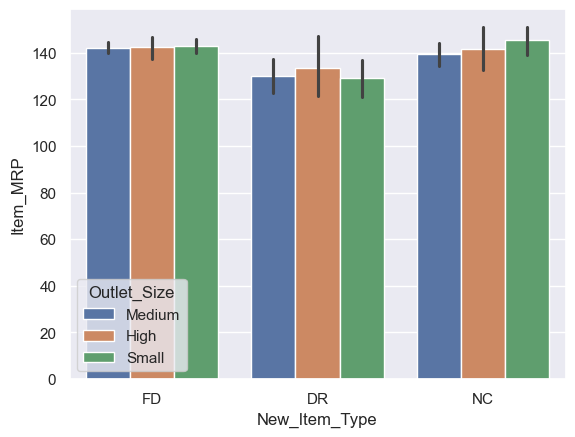

In [81]:
sns.barplot(x = df['New_Item_Type'], y = df['Item_MRP'], hue= df['Outlet_Size'])

<Axes: xlabel='New_Item_Type', ylabel='Item_MRP'>

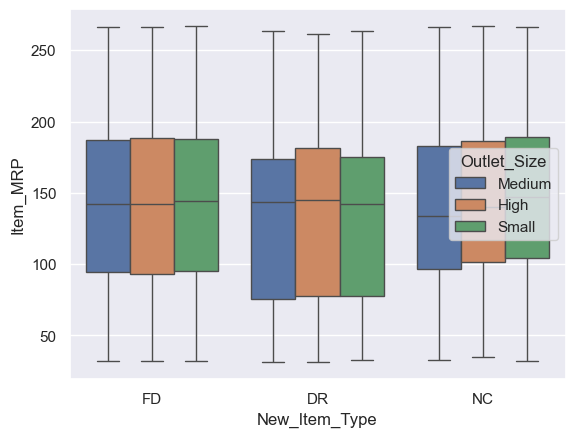

In [85]:
sns.boxplot(x = df['New_Item_Type'], y = df['Item_MRP'], hue= df['Outlet_Size'])

<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

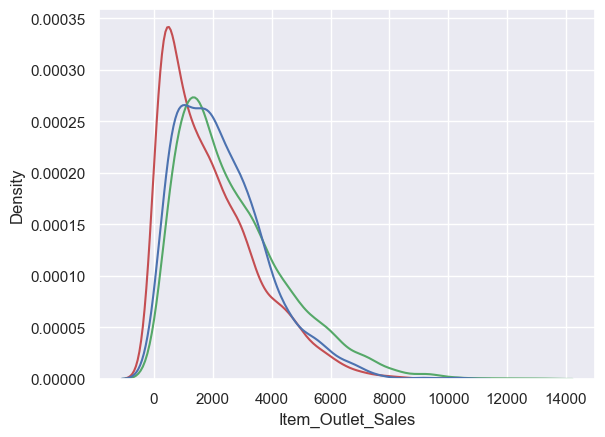

In [92]:
sns.kdeplot(df[df['Outlet_Size']=='Small']['Item_Outlet_Sales'], c = 'r')
sns.kdeplot(df[df['Outlet_Size']=='Medium']['Item_Outlet_Sales'], c = 'g')
sns.kdeplot(df[df['Outlet_Size']=='High']['Item_Outlet_Sales'], c = 'b')

<Axes: xlabel='New_Item_Type', ylabel='Item_Outlet_Sales'>

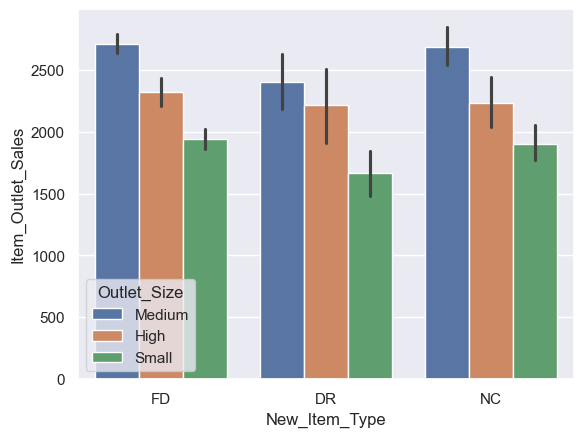

In [80]:
sns.barplot(x = df['New_Item_Type'], y = df['Item_Outlet_Sales'], hue=df['Outlet_Size'])

<Axes: xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

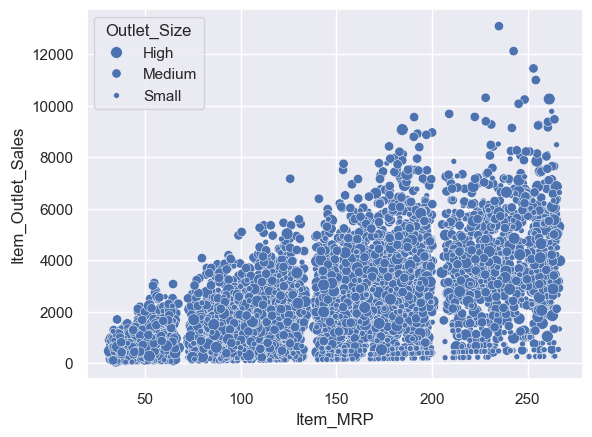

In [79]:
sns.scatterplot(data=df, x = "Item_MRP", y = "Item_Outlet_Sales", size=df['Outlet_Size'], size_order=['High', 'Medium', 'Small'])

<Axes: xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

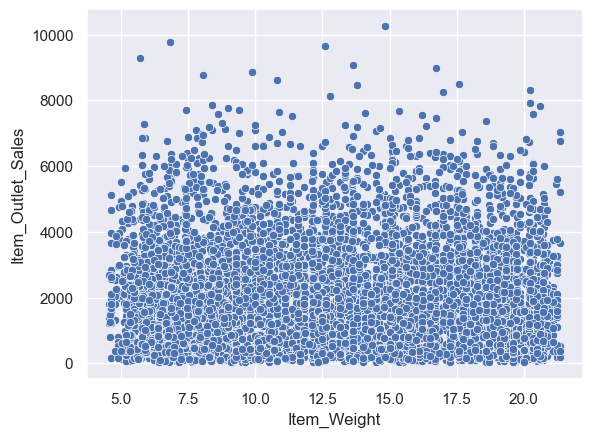

In [68]:
sns.scatterplot(x = df['Item_Weight'], y = df['Item_Outlet_Sales'])

<Axes: xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

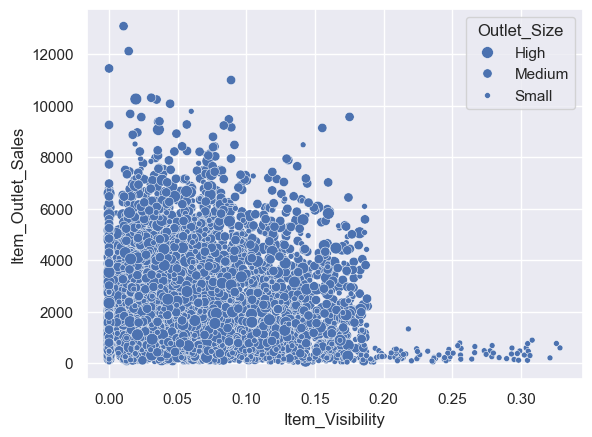

In [78]:
sns.scatterplot(x = df['Item_Visibility'], y = df['Item_Outlet_Sales'], size=df['Outlet_Size'], size_order=['High', 'Medium', 'Small'])

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

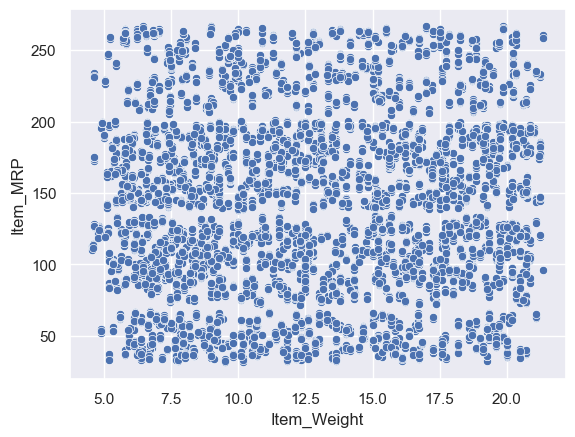

In [72]:
sns.scatterplot(x = df['Item_Weight'], y = df['Item_MRP'])

In [180]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Age'],
      dtype='object')

In [181]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [182]:
pr2 = ProfileReport(df = df.drop(columns=['Item_Identifier','Item_Type', 'Outlet_Identifier', 'Outlet_Establishment_Year']))

In [183]:
# pr2.to_file(output_file='new_report.htmp')

Render HTML: 100%|██████████| 1/1 [00:00<00:00,  1.11it/s]
C:\Users\Parag\anaconda3\Lib\site-packages\ydata_profiling\profile_report.py:379: UserWarning: Extension .htmp not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 63.37it/s]


In [94]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [93]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Age'],
      dtype='object')

In [102]:
pd.crosstab(df['Outlet_Age'], df['Outlet_Size'])

Outlet_Size,High,Medium,Small
Outlet_Age,,,
4,0,928,0
9,0,0,930
14,0,930,0
16,0,0,930
26,932,0,0
28,0,935,528


In [100]:
pd.crosstab(df['Outlet_Type'], df['Outlet_Location_Type'])

Outlet_Location_Type,Tier 1,Tier 2,Tier 3
Outlet_Type,,,
Grocery Store,528,0,555
Supermarket Type1,1860,2785,932
Supermarket Type2,0,0,928
Supermarket Type3,0,0,935


<Axes: xlabel='Outlet_Establishment_Year', ylabel='Outlet_Type'>

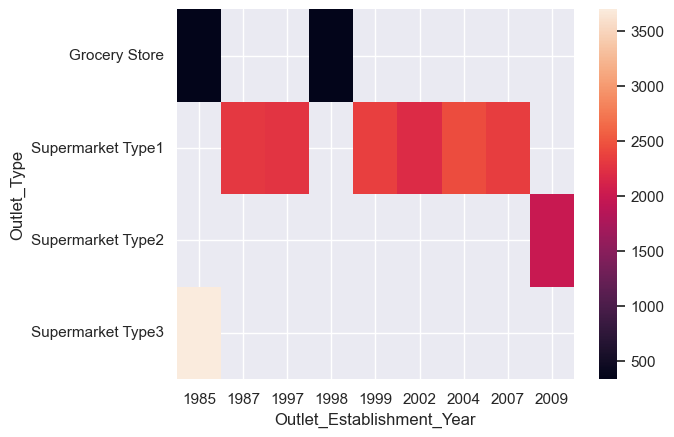

In [109]:
sns.heatmap(df.pivot_table(values='Item_Outlet_Sales', index='Outlet_Type', columns='Outlet_Establishment_Year'))

In [110]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
New_Item_Type                   0
Outlet_Age                      0
dtype: int64

In [111]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Age'],
      dtype='object')

In [113]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
New_Item_Type                 object
Outlet_Age                     int64
dtype: object

In [115]:
def get_corr(df):
    cols = []
    for col, dtype in dict(df.dtypes).items():
        if dtype == 'int' or dtype == 'float':
            cols.append(col)
    return df[cols].corr()

In [117]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Item_Type', 'Outlet_Age'],
      dtype='object')

<Axes: >

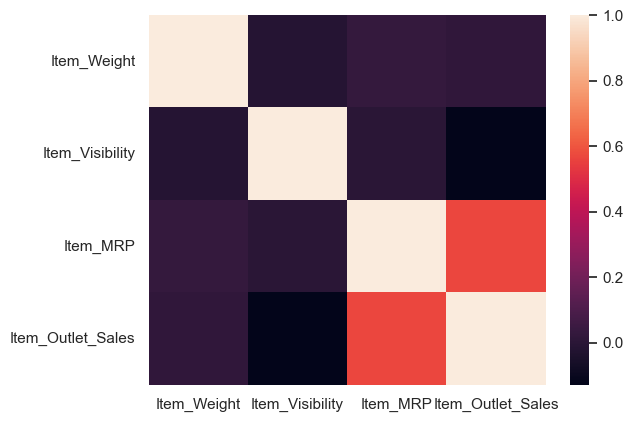

In [118]:
sns.heatmap(get_corr(df))

![alt text](img2.png)

In [119]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Type,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


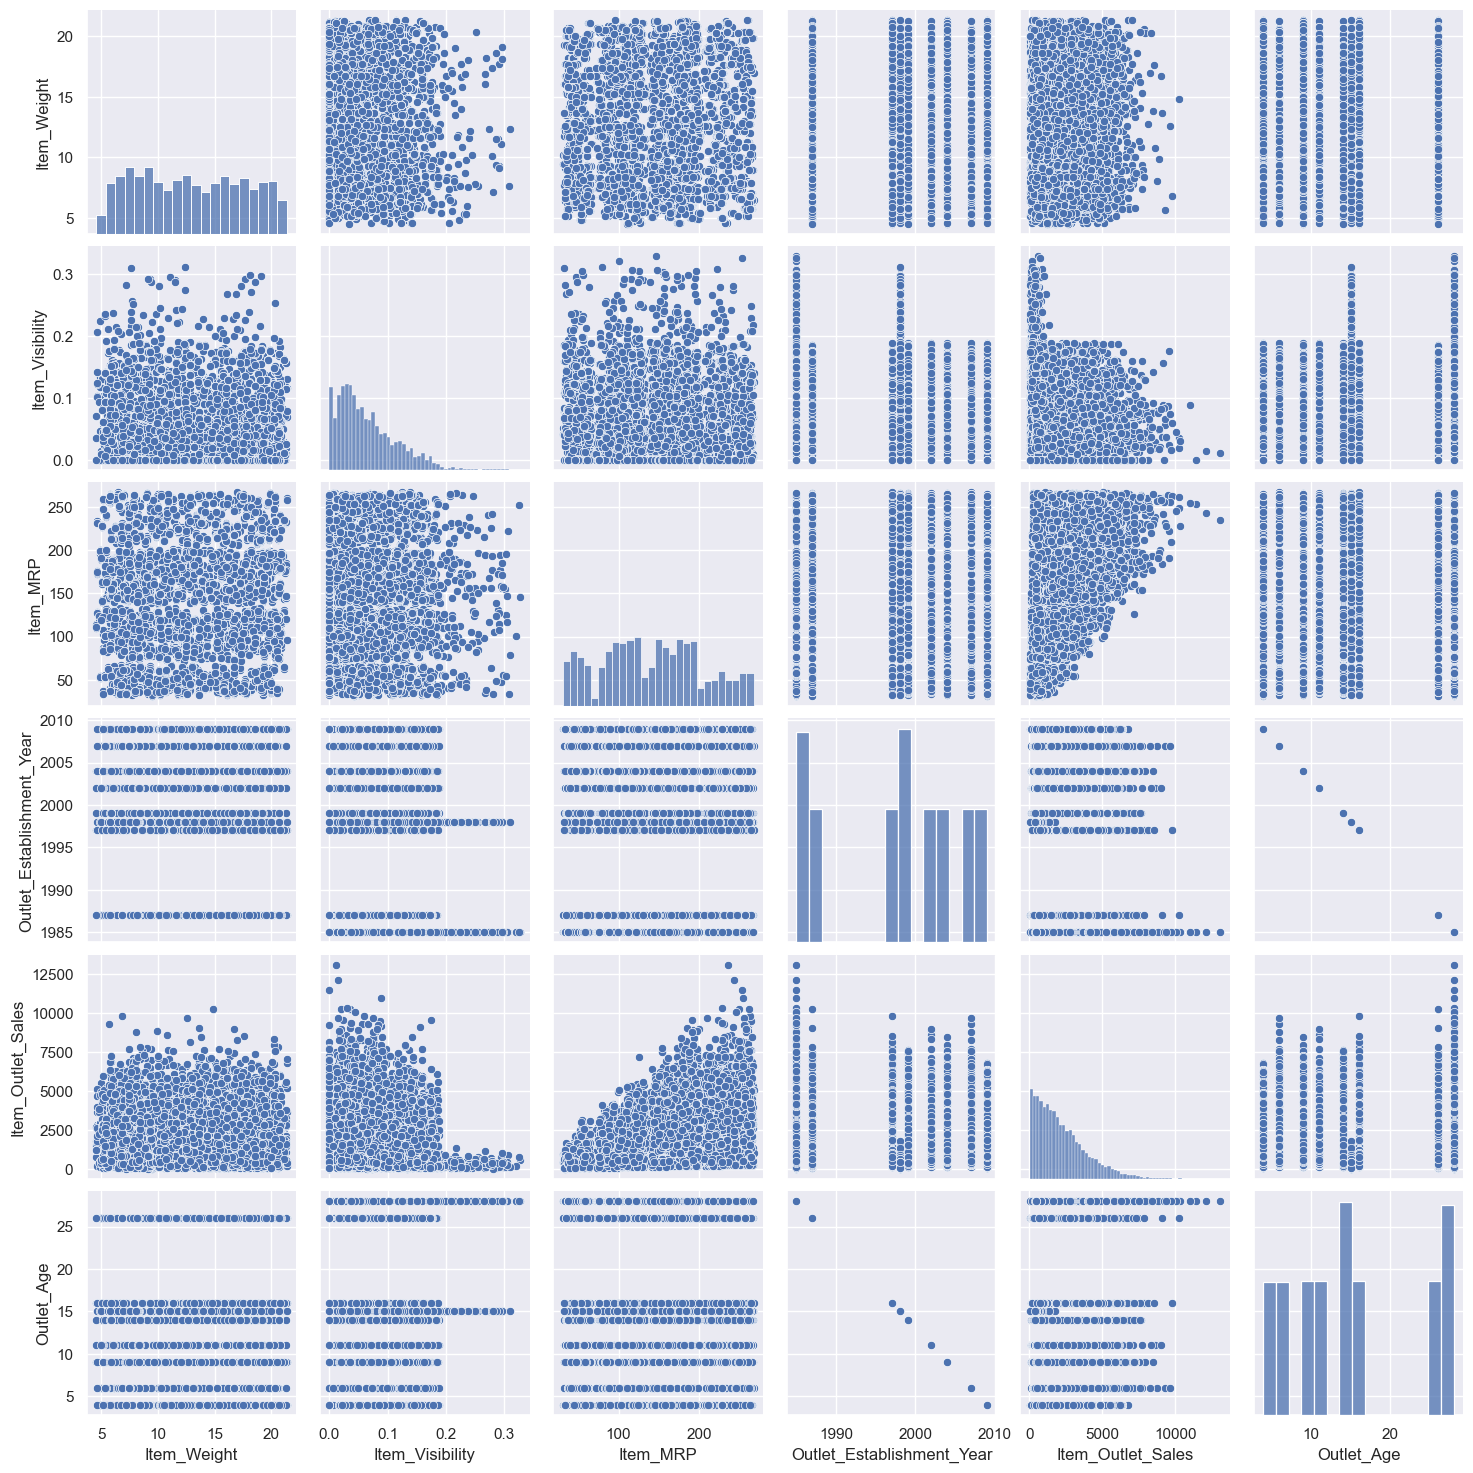

In [135]:
sns.pairplot(df)

## Remarks

1) Missing Values in Item Weight, Outlet Size columns
2) Many zeros in Item Visibility Column (May be zero values are missing values) and outliers in left side.
3) Item weight is approximately normally distributed without any outliers.
4) Item Visibility can be made normal using sqrt transform.
5) The distribution of Item MRP is Multimodal, we need to split this feature using Discritization.
6) Outlet sales (target) distribution is highly right skewed, can be made nearly normal using log transform (log1p) -> reduces no. of outliers
7) Column New Item Type have imbalanced frequencies, similarly Outlet Type column also
8) New Item type and Item fat content are highly correlated (corr = 0.729)
9) Outlet age and Outlet Location type are also highly correlated (corr = 0.739)
10) Outlet age, Outlet Location Type, Outlet Size, Outlet Type are correlated with each other
11) Outlet_Age should be converted to discrete categorical variable using Discritization.

In [134]:
df.drop(columns=['Item_Identifier', 'Outlet_Identifier']).to_csv(path_or_buf="new_df.csv")